## About dataset:

WHO has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [1]:
import pandas as pd
import numpy as np

### Import and checking dataset

In [2]:
raw_data = pd.read_csv('C:/Users/arkad/Desktop/Pliki_do_analizy/heat_disease_ds_kaggle/framingham.csv')
raw_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


## Checking correlation with target column 'TenYearCHD'

In [5]:
raw_data.corrwith(raw_data.TenYearCHD)*100

male                 8.842757
age                 22.525610
education           -5.405896
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

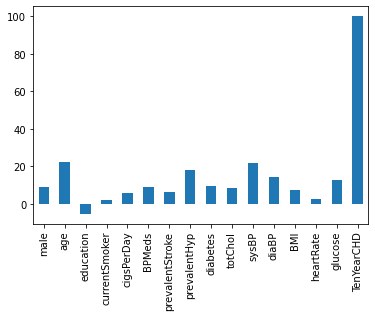

In [6]:
(raw_data.corrwith(raw_data.TenYearCHD)*100).plot(kind='bar')

# Plotting charts in order to see variable distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
raw_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

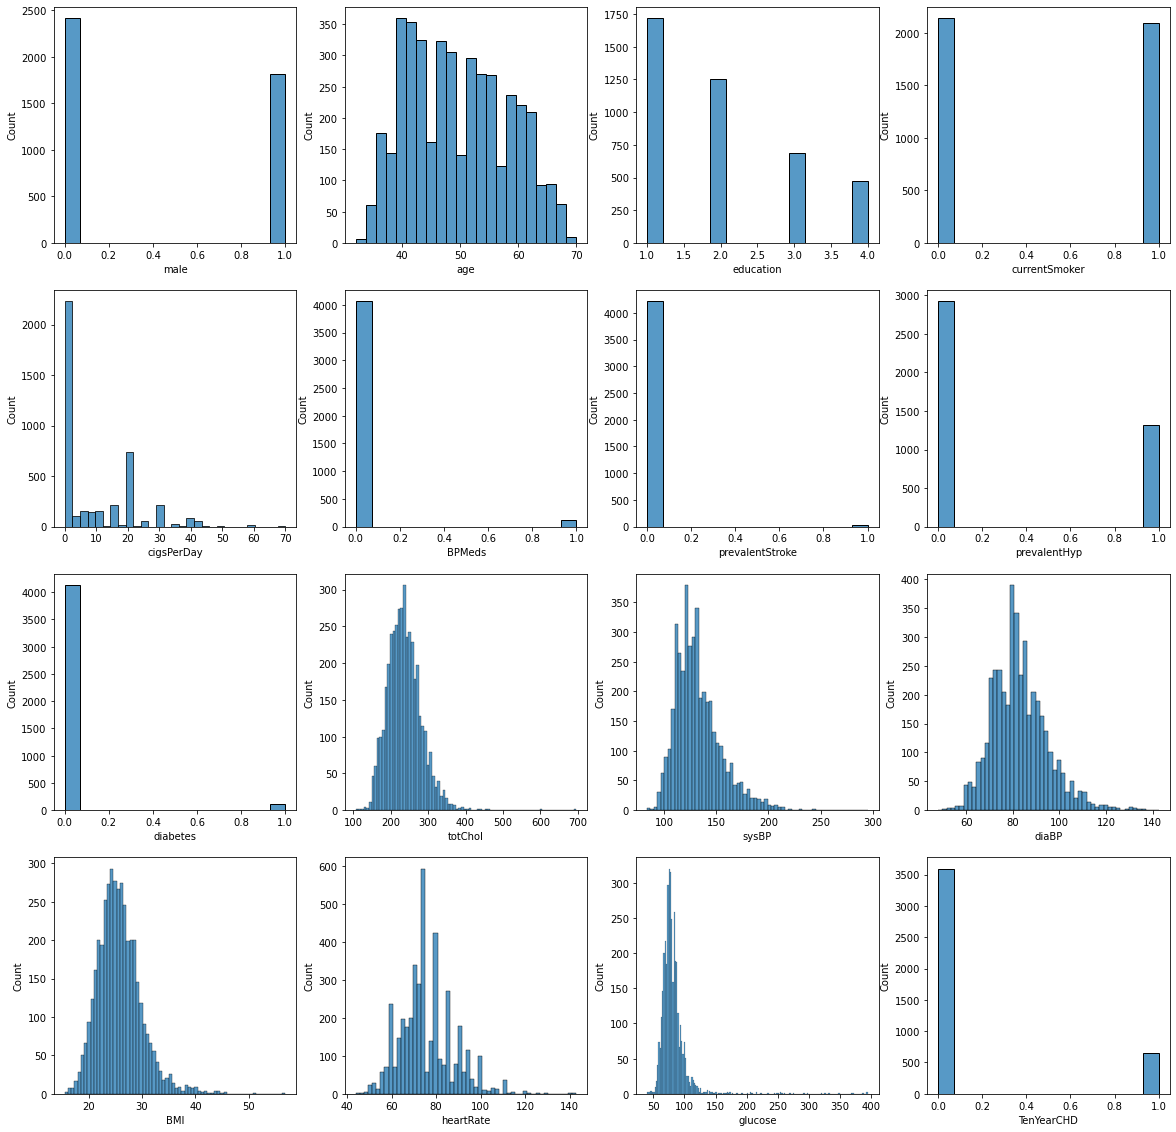

In [9]:
cols =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.histplot(raw_data[cols[i-1]])

# Comparing the data in each column with and without cases of heart disease

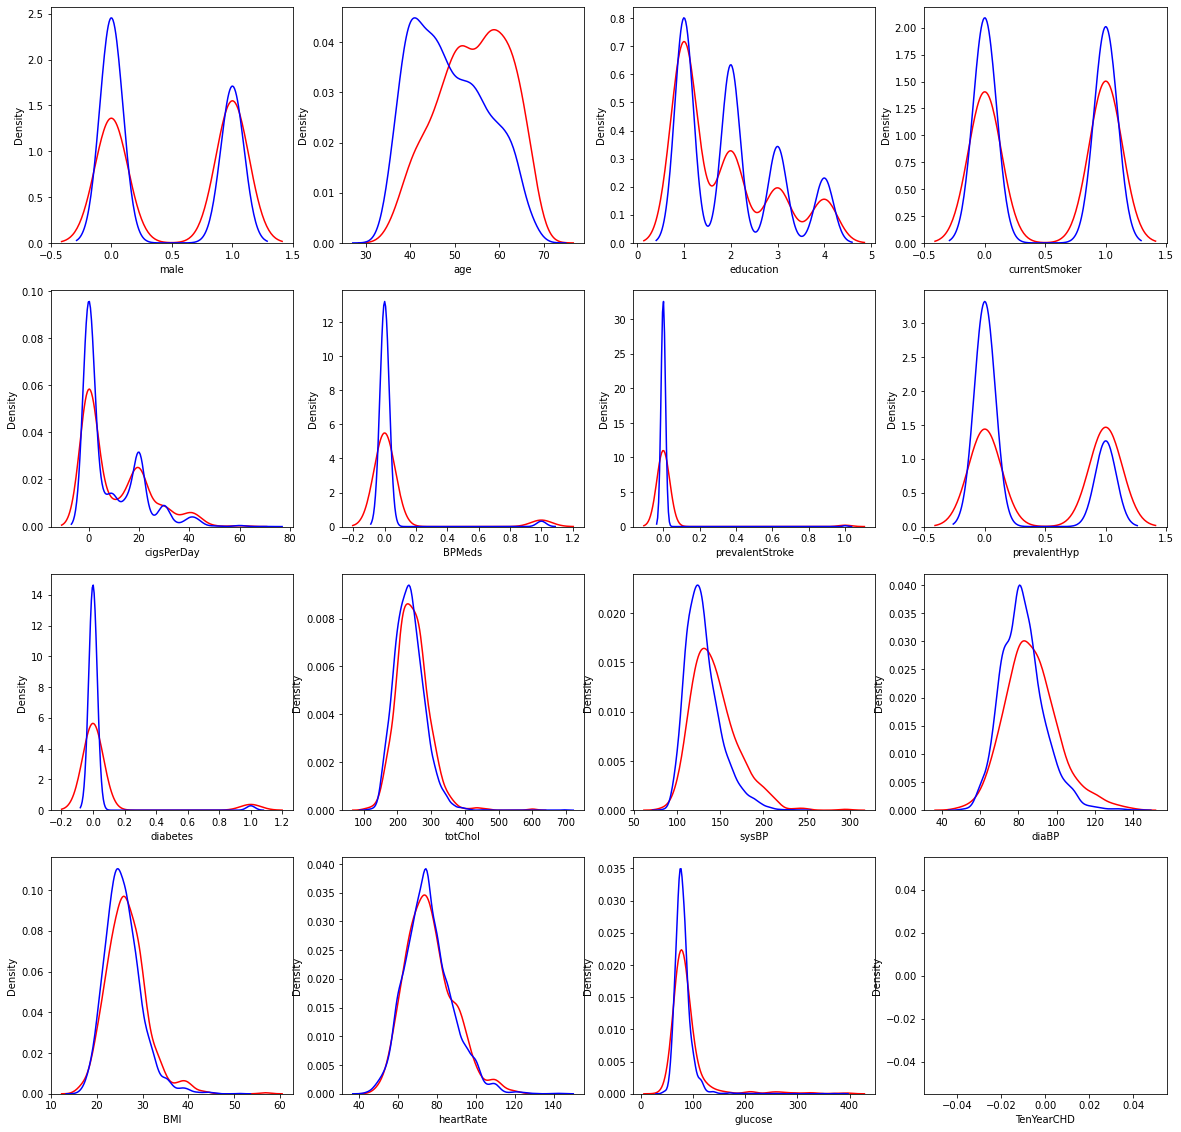

In [10]:
cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range (1,17):
    plt.subplot(4,4,i)
    sns.kdeplot(raw_data[raw_data['TenYearCHD']==1][cols[i-1]],color='red',warn_singular=False)
    sns.kdeplot(raw_data[raw_data['TenYearCHD']==0][cols[i-1]],color='blue',warn_singular=False)

# Checking average and median value with and without heart disease

In [11]:
raw_data.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [12]:
raw_data.median()

male                 0.0
age                 49.0
education            2.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
diabetes             0.0
totChol            234.0
sysBP              128.0
diaBP               82.0
BMI                 25.4
heartRate           75.0
glucose             78.0
TenYearCHD           0.0
dtype: float64

In [13]:
raw_data.groupby(by='TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [14]:
raw_data.groupby(by='TenYearCHD').median()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.0,48.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,127.0,81.0,25.250,75.0,78.0
1,1.0,55.0,1.0,1.0,2.5,0.0,0.0,1.0,0.0,241.0,139.0,85.5,26.155,75.0,79.0


In [15]:
raw_data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

### Checking missing values and fill or remove empty rows

In [16]:
raw_data.isnull().sum()[raw_data.isnull().sum()>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [17]:
percentage_empty_rows=raw_data.isnull().sum()[raw_data.isnull().sum()>0]

In [18]:
percentage_empty_rows=(percentage_empty_rows/4238)*100

In [19]:
percentage_empty_rows

education     2.477584
cigsPerDay    0.684285
BPMeds        1.250590
totChol       1.179802
BMI           0.448325
heartRate     0.023596
glucose       9.155262
dtype: float64

### There are not many empty rows releating to total dataset so filling empty rows by mean or median shouldn't mess up data distribution. Make copy of dataset

In [20]:
data = raw_data.copy()

In [21]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
data['education_mean'] = data['education'].fillna(data['education'].mean())
data['education_median'] = data['education'].fillna(data['education'].median())

<AxesSubplot:ylabel='Density'>

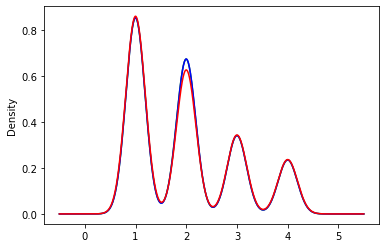

In [23]:
fig=plt.figure()
ax=fig.add_subplot()
data['education_mean'].plot.density(ax=ax,color='green')
data['education_median'].plot.density(ax=ax,color='blue')
data['education'].plot.density(ax=ax,color='red')

In [24]:
data['cigsPerDay_mean'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['cigsPerDay_median'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())

<AxesSubplot:ylabel='Density'>

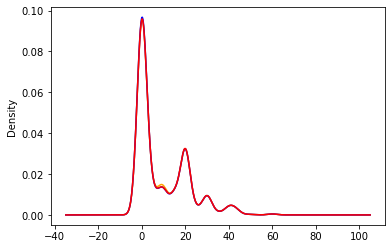

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['cigsPerDay_mean'].plot.density(ax=ax,color='orange')
data['cigsPerDay_median'].plot.density(ax=ax,color='blue')
data['cigsPerDay'].plot.density(ax=ax,color='red')

In [26]:
data['BPMeds_mean'] = data['BPMeds'].fillna(data['BPMeds'].mean())
data['BPMeds_median'] = data['BPMeds'].fillna(data['BPMeds'].median())

<AxesSubplot:ylabel='Density'>

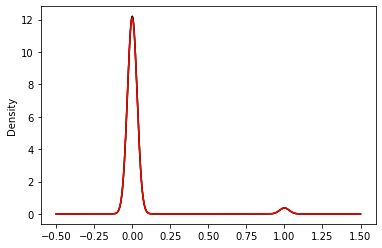

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['BPMeds_mean'].plot.density(ax=ax,color='green')
data['BPMeds_median'].plot.density(ax=ax,color='black')
data['BPMeds'].plot.density(ax=ax,color='red')

In [28]:
data['totChol_mean']=data['totChol'].fillna(data['totChol'].mean())
data['totChol_median']=data['totChol'].fillna(data['totChol'].median())

<AxesSubplot:ylabel='Density'>

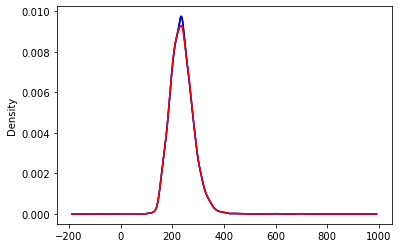

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['totChol_mean'].plot.density(ax=ax,color='black')
data['totChol_median'].plot.density(ax=ax,color='blue')
data['totChol'].plot.density(ax=ax,color='red')

In [30]:
data['BMI_mean']=data['BMI'].fillna(data['BMI'].mean())
data['BMI_median']=data['BMI'].fillna(data['BMI'].median())

<AxesSubplot:ylabel='Density'>

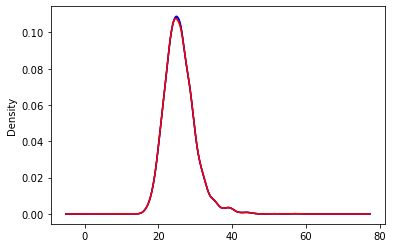

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['BMI_mean'].plot.density(ax=ax,color='black')
data['BMI_median'].plot.density(ax=ax,color='blue')
data['BMI'].plot.density(ax=ax,color='red')

In [32]:
data['glucose_mean']=data['glucose'].fillna(data['glucose'].mean())
data['glucose_median']=data['glucose'].fillna(data['glucose'].median())

<AxesSubplot:ylabel='Density'>

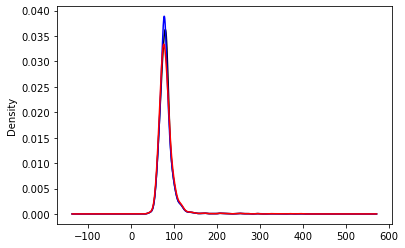

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['glucose_mean'].plot.density(ax=ax,color='black')
data['glucose_median'].plot.density(ax=ax,color='blue')
data['glucose'].plot.density(ax=ax,color='red')

### For heartRate column empty row will be filled by median due to only one empty row.

In [34]:
data['heartRate_median'] = data['heartRate'].fillna(data['heartRate'].median())

##### After checking at charts there is not data distribution changes. Charts show that median is covered with data well. To compare previous data with data filled by mode, correlation is used.

<AxesSubplot:>

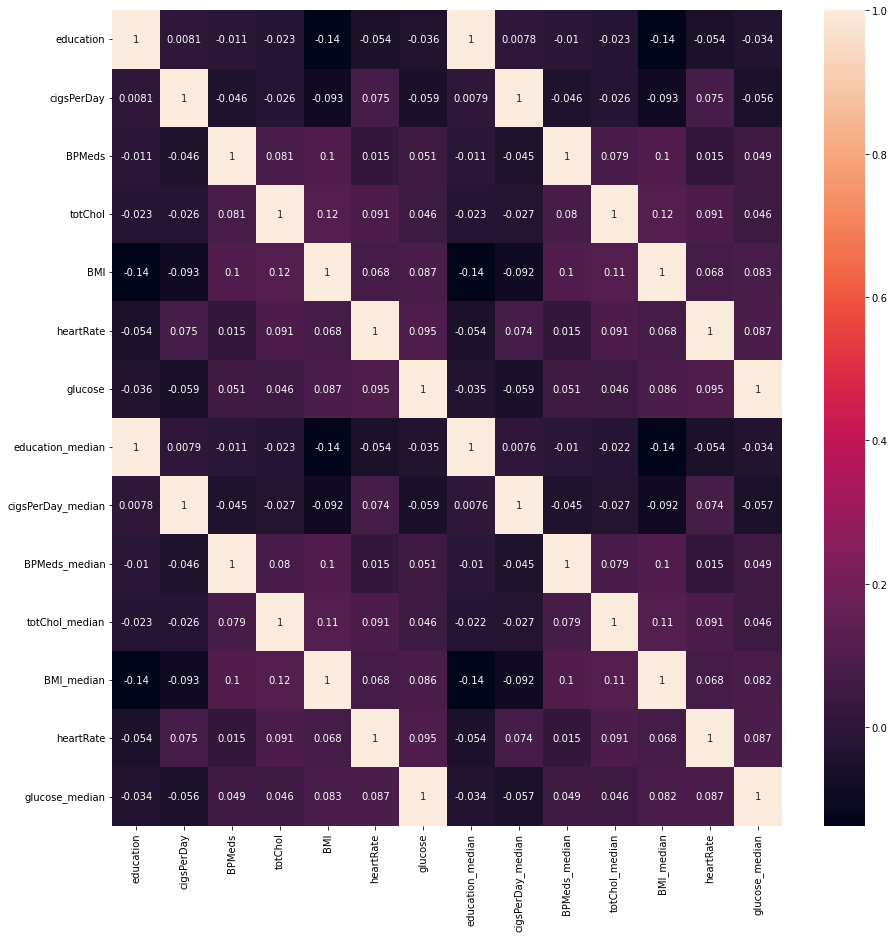

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose',
      'education_median','cigsPerDay_median','BPMeds_median','totChol_median','BMI_median','heartRate','glucose_median']].corr(),annot=True)

##### Correlation with no changes before and now

## Creating new data frame with filled empty rows

In [36]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'education_mean',
       'education_median', 'cigsPerDay_mean', 'cigsPerDay_median',
       'BPMeds_mean', 'BPMeds_median', 'totChol_mean', 'totChol_median',
       'BMI_mean', 'BMI_median', 'glucose_mean', 'glucose_median',
       'heartRate_median'],
      dtype='object')

In [37]:
filled_data = data[['male', 'age', 'education_median', 'currentSmoker', 'cigsPerDay_median', 
       'prevalentHyp', 'totChol_median', 'sysBP','BPMeds_median','prevalentStroke','diabetes',
       'diaBP', 'BMI_median', 'heartRate_median', 'glucose_median', 'TenYearCHD']]

In [38]:
filled_data.head()

,male,age,education_median,currentSmoker,cigsPerDay_median,prevalentHyp,totChol_median,sysBP,BPMeds_median,prevalentStroke,diabetes,diaBP,BMI_median,heartRate_median,glucose_median,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,0.0,0,0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,0.0,0,0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,0.0,0,0,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,0.0,0,0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,0.0,0,0,84.0,23.10,85.0,85.0,0


In [39]:
filled_data.info() # checking if each empty row is filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               4238 non-null   int64  
 1   age                4238 non-null   int64  
 2   education_median   4238 non-null   float64
 3   currentSmoker      4238 non-null   int64  
 4   cigsPerDay_median  4238 non-null   float64
 5   prevalentHyp       4238 non-null   int64  
 6   totChol_median     4238 non-null   float64
 7   sysBP              4238 non-null   float64
 8   BPMeds_median      4238 non-null   float64
 9   prevalentStroke    4238 non-null   int64  
 10  diabetes           4238 non-null   int64  
 11  diaBP              4238 non-null   float64
 12  BMI_median         4238 non-null   float64
 13  heartRate_median   4238 non-null   float64
 14  glucose_median     4238 non-null   float64
 15  TenYearCHD         4238 non-null   int64  
dtypes: float64(9), int64(7)


### Each column shows corrected value. Now outliers are checked

<AxesSubplot:>

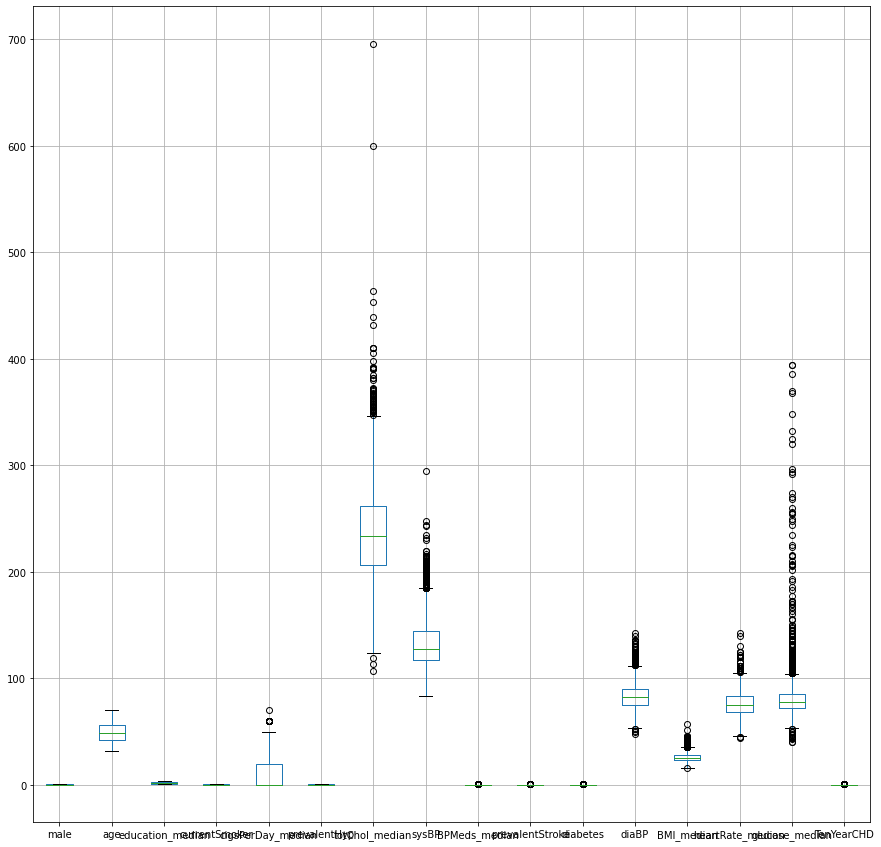

In [40]:
plt.figure(figsize=(15,15))
filled_data.boxplot()

In [41]:
filled_data.columns

Index(['male', 'age', 'education_median', 'currentSmoker', 'cigsPerDay_median',
       'prevalentHyp', 'totChol_median', 'sysBP', 'BPMeds_median',
       'prevalentStroke', 'diabetes', 'diaBP', 'BMI_median',
       'heartRate_median', 'glucose_median', 'TenYearCHD'],
      dtype='object')

### Removing outliers using z-score

In [42]:
from scipy import stats

z_score_data = np.abs(stats.zscore(filled_data))

In [43]:
z_score_data

,male,age,education_median,currentSmoker,cigsPerDay_median,prevalentHyp,totChol_median,sysBP,BPMeds_median,prevalentStroke,diabetes,diaBP,BMI_median,heartRate_median,glucose_median,TenYearCHD
0,1.153192,1.234951,2.006559,0.988271,0.751322,0.671101,0.940600,1.195907,0.173612,0.077033,0.162477,1.082625,0.287379,0.342761,0.201359,0.423305
1,0.867158,0.418257,0.020387,0.988271,0.751322,0.671101,0.300313,0.515187,0.173612,0.077033,0.162477,0.158988,0.719752,1.590291,0.245099,0.423305
2,1.153192,0.184916,0.972700,1.011868,0.929210,0.671101,0.187503,0.220209,0.173612,0.077033,0.162477,0.242955,0.113057,0.073082,0.507537,0.423305
3,0.867158,1.331800,1.013473,1.011868,1.769476,1.490089,0.263739,0.800871,0.173612,0.077033,0.162477,1.016549,0.682902,0.904768,0.935872,2.362360
4,0.867158,0.418257,1.013473,1.011868,1.181289,0.671101,1.089985,0.106755,0.173612,0.077033,0.162477,0.092912,0.663350,0.758605,0.148558,0.423305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,0.048425,0.972700,1.011868,0.667296,1.490089,1.721723,2.116930,0.173612,0.077033,0.162477,0.764648,0.041713,0.821599,0.192298,2.362360
4234,1.153192,0.165095,1.013473,1.011868,2.861821,0.671101,0.669856,0.265590,0.173612,0.077033,0.162477,0.242955,1.496159,0.904768,0.595016,0.423305
4235,0.867158,0.184916,0.020387,1.011868,0.929210,0.671101,0.255189,0.061374,0.173612,0.077033,0.162477,0.914691,0.933583,0.675436,0.192298,0.423305
4236,0.867158,0.651598,0.972700,1.011868,0.509077,0.671101,0.602170,0.265590,0.173612,0.077033,0.162477,0.344813,1.631275,0.841773,0.157620,0.423305


In [44]:
threshold = 4
np.where(z_score_data > threshold)

(array([  13,   37,   37,   42,   44,   44,   44,   56,   66,   66,   78,
          96,  114,  154,  158,  161,  194,  247,  249,  249,  255,  255,
         260,  284,  294,  299,  311,  327,  333,  339,  346,  357,  358,
         374,  421,  433,  443,  446,  451,  458,  471,  471,  475,  481,
         481,  541,  543,  585,  590,  646,  660,  665,  699,  721,  723,
         738,  750,  750,  763,  763,  763,  786,  795,  833,  833,  833,
         864,  864,  890,  894,  903,  952,  952,  969,  976, 1022, 1030,
        1041, 1044, 1054, 1068, 1078, 1079, 1110, 1111, 1111, 1123, 1165,
        1189, 1189, 1197, 1238, 1238, 1262, 1268, 1268, 1303, 1333, 1340,
        1363, 1363, 1377, 1389, 1452, 1468, 1478, 1485, 1485, 1488, 1521,
        1525, 1550, 1553, 1557, 1601, 1624, 1649, 1649, 1674, 1674, 1715,
        1717, 1751, 1762, 1768, 1803, 1808, 1849, 1854, 1854, 1856, 1895,
        1902, 1907, 1931, 1931, 1947, 1975, 1989, 1989, 1994, 1995, 1997,
        1997, 2007, 2024, 2036, 2041, 

In [45]:
filled_data_z_score = filled_data[(z_score_data < threshold).all(axis = 1)]

In [46]:
filled_data_z_score.head()

,male,age,education_median,currentSmoker,cigsPerDay_median,prevalentHyp,totChol_median,sysBP,BPMeds_median,prevalentStroke,diabetes,diaBP,BMI_median,heartRate_median,glucose_median,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,0.0,0,0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,0.0,0,0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,0.0,0,0,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,0.0,0,0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,0.0,0,0,84.0,23.10,85.0,85.0,0


<AxesSubplot:>

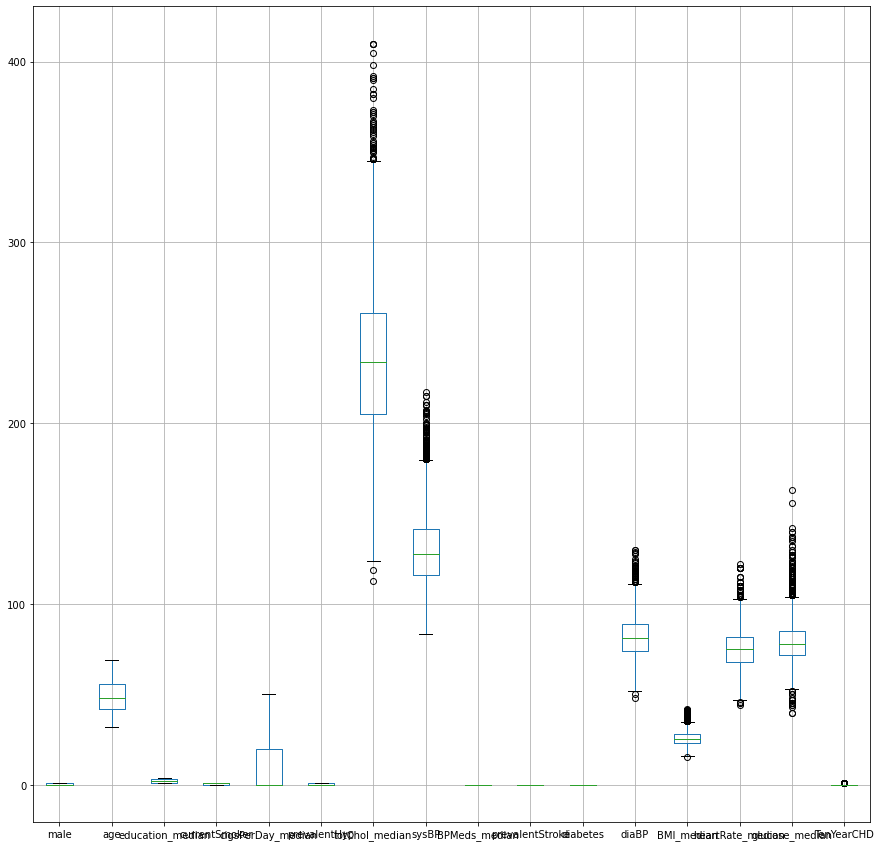

In [47]:
plt.figure(figsize=(15,15))
filled_data_z_score.boxplot()

#### Data can be split at test and train dataset

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = filled_data_z_score
y = filled_data_z_score.pop('TenYearCHD')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
print(f'Target train set size: {y_train.shape}')
print(f'Target test size: {y_test.shape}')

Train set size: (3165, 15)
Test set size: (792, 15)
Target train set size: (3165,)
Target test size: (792,)


#### In order to increase accuracy of  model, StandardScaler will be used

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=3000)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

#### Predicition based on model

In [54]:
y_pred = logReg.predict(X_test)
y_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Model evaluation

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8573232323232324


##### Confusion Matrix

In [56]:
confusion_matrix(y_test, y_pred)

array([[677,   1],
       [112,   2]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       678
           1       0.67      0.02      0.03       114

    accuracy                           0.86       792
   macro avg       0.76      0.51      0.48       792
weighted avg       0.83      0.86      0.80       792



## SVC

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [59]:
classifier = SVC(kernel='linear')
param_grid = {'C':np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])}
grid_search = GridSearchCV(classifier,param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'C': 1}

In [61]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [62]:
svc_pred = svc.predict(X_test)

In [63]:
svc_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
confusion_matrix(y_test,svc_pred)

array([[678,   0],
       [114,   0]], dtype=int64)

In [65]:
print(f'Accuracy: {accuracy_score(y_test, svc_pred)}')

Accuracy: 0.8560606060606061


In [66]:
confusion_matrix(y_test, y_pred)

array([[677,   1],
       [112,   2]], dtype=int64)

In [67]:
print(classification_report(y_test,svc_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       678
           1       1.00      0.00      0.00       114

    accuracy                           0.86       792
   macro avg       0.93      0.50      0.46       792
weighted avg       0.88      0.86      0.79       792



## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree_classifier = DecisionTreeClassifier()
param_grid_tree = {'max_depth':[1,2,3,4,5,6,7,8,9],
                  'criterion':['gini','entropy'],
                  'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
grid_search_tree = GridSearchCV(tree_classifier,param_grid_tree,scoring='accuracy',cv=5)
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [70]:
 grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}

In [71]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)

In [72]:
y_pred_tree=tree_model.predict(X_test)
y_pred_tree[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
confusion_matrix(y_test, y_pred_tree)

array([[678,   0],
       [114,   0]], dtype=int64)

In [74]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree)}')

Accuracy: 0.8560606060606061


In [75]:
print(classification_report(y_test,y_pred_tree, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       678
           1       1.00      0.00      0.00       114

    accuracy                           0.86       792
   macro avg       0.93      0.50      0.46       792
weighted avg       0.88      0.86      0.79       792

